<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/Assignments/fourth%20Assing./assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important imports



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests, io
from sklearn.preprocessing import scale




'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # 

#importing Data
I imprort data from my git hub page


In [0]:
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./X.npz'
s=requests.get(url, stream=True).content
data_X=np.load(io.BytesIO(s) )
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./Y.npz'
s=requests.get(url, stream=True).content
data_Y = np.load(io.BytesIO(s))

the shape of X is (102352, 1024): 
the shape of Y is (102352,): 


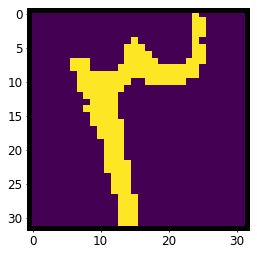

In [70]:
X = data_X['arr_0'].reshape(-1,32*32)
# X = scale(X)    scaling data destroyes them. TRY it!!!
X_pic = X.reshape(-1,32,32)
Y = data_Y['arr_0']

plt.imshow(X_pic[12])
print('the shape of X is {}: '.format(X.shape))
print('the shape of Y is {}: '.format(Y.shape))



#Visualising data

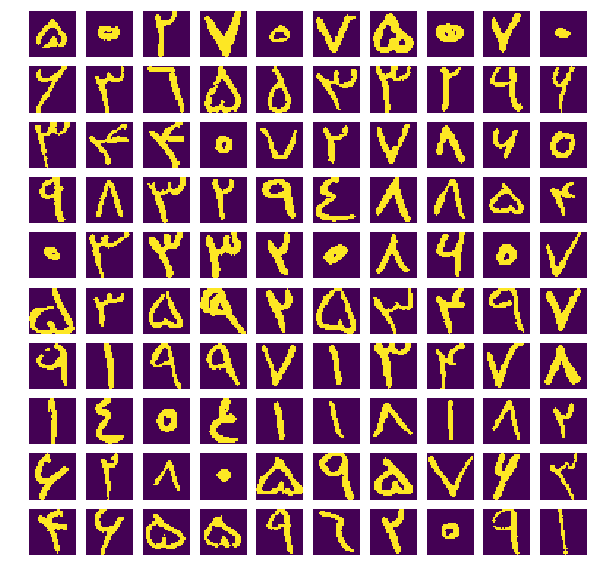

In [71]:
fig = plt.figure(figsize = (10,10))
for i in range(1,101):
  ax = fig.add_subplot(10,10,i)
  ax.imshow(X_pic[i])
  ax.axis("off")
  
  

#Short about our data set
our data set is a collection of 32*32 pixel of persian hand writing digits

the number of digits is 102352 

#Implementing PCA method for feature reduction

In [72]:
from sklearn.decomposition import PCA
n_components = 20
pca = PCA(n_components)
pca.fit(X)
pca_X = pca.transform(X)
print('the shape of the original data is : {}'.format(X.shape))
print('the shape of the data after implementing PCA is : {}'.format(pca_X.shape))

the shape of the original data is : (102352, 1024)
the shape of the data after implementing PCA is : (102352, 20)


the shape of the pca_X_pic is : (102352, 32, 32)
the result with n_components = 20 is :


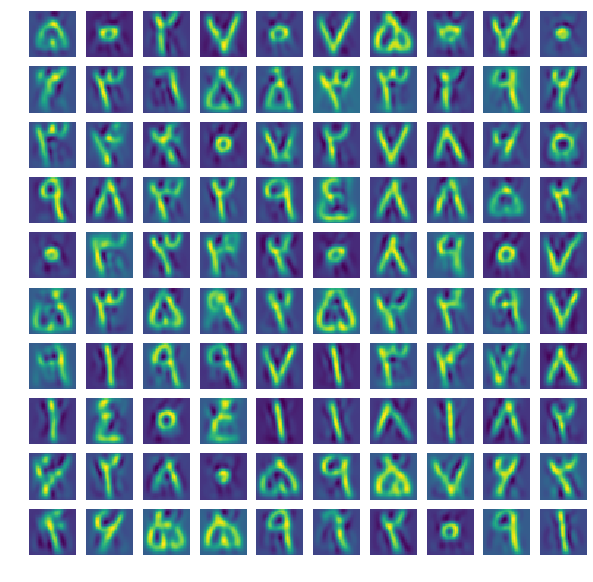

In [73]:
pca_X_pic = pca.inverse_transform(pca_X)
pca_X_pic = pca_X_pic.reshape(-1,32,32)
print('the shape of the pca_X_pic is : {}'.format(pca_X_pic.shape))
print('the result with n_components = {} is :'.format(n_components))
fig = plt.figure(figsize=(10,10))
for i in range(1,101):
  ax = fig.add_subplot(10,10,i)
  ax.imshow(pca_X_pic[i])
  ax.axis('off')
  

#Ploting the SCREE plot of the features
in this section I want to plot the importance of the pca features in a bar plot

the scree plot of the features is :


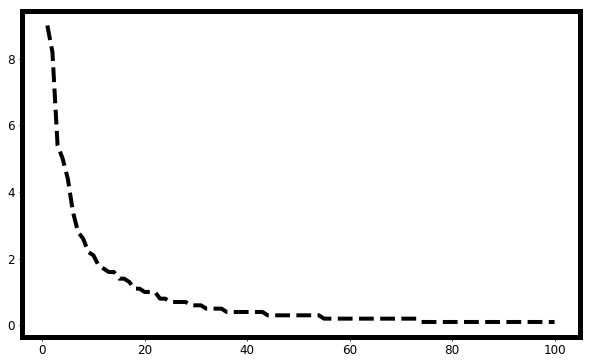

In [74]:
n=100
pca = PCA(n)
pca.fit(X)
data = pca.transform(X)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
#labels = ["PC" + str(i) for i in range (1,len(per_var)+1)]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
print('the scree plot of the features is :')
#ax.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
ax.plot(range(1,len(per_var)+1),per_var,'k--',linewidth=4,)

#Mian part of code
now we have both original data and 'PCA' ed data 


The Originial data is -----> **X**. Its shape is (n_s,32*32). We also have this data set as Images. i.e.** X_pic** which its shape is (n_s,32,32)

The 'PCA' ed data is ------> **pca_X**. Its shape is (n_s, n_com*n_com). **(((Note tata n_com is the numper of PCA components)))**.We also have 'PCA' ed data as image which is **pca_X_pic**

**now until end I will implement the algorithms on ORIGINAL data**

#Data preparation


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y)
pca_X_train, pca_X_test, Y_train, Y_test =  train_test_split(pca_X,Y)




---



---



---


#Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
score = model.score(X_test, Y_test)
print("the score of the linear regression is: {} ".format(score))

the score of the linear regression is: -0.014024543810765566 


And some cool predictions:

[4.448026]


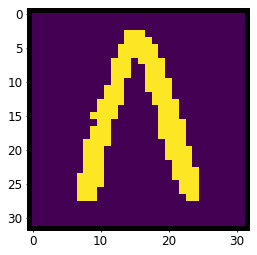

In [81]:
i=32
plt.imshow(X[i].reshape(32,32))
predict=model.predict(X[i].reshape(1,-1))
print(predict)

#Support Vector Machine Classifier

In [85]:
from sklearn import svm
model = svm.SVC(kernel='linear')
# runnig this algorithm with ariginal data takes very very long time
# so for this regressoin i am going to use 'PCA'ed data
model.fit(pca_X_train, Y_train)
score = model.score(pca_X_test, Y_test)
print("the score of the SVC is: {} ".format(score))

the score of the SVC is: 0.9468110051586681 


and some cool prediction

the predicted value is: [9]


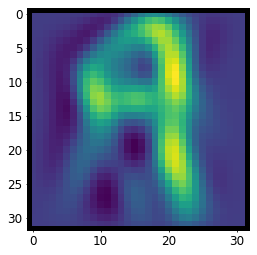

In [86]:
i = 755
plt.imshow(pca_X_pic[i])
print('the predicted value is: {}'.format(model.predict(pca_X[i].reshape(-1,20))))


**Confusing matrix**


|TP||FP|
|----||----|
|FN ||TN|

In [87]:
from sklearn.metrics import confusion_matrix
Y_predict = model.predict(pca_X_test)
cnfmatrix = confusion_matrix(Y_test,Y_predict)
print(cnfmatrix)

[[2533    0    0    0    1   13    0    0    0    0]
 [   1 2543    8    0    5    0    4    0    1    6]
 [   4   23 2339   46   30    0   24    5    0    7]
 [   9    0  170 2250  136    8    3    2    0    3]
 [  13    7   48  192 2280   20   23   13    8    7]
 [  12    1    0    3   14 2485    4   10    8    0]
 [   9   13   59   22   18    3 2323   13    3   82]
 [   2    3   14    1    6    4   14 2548    0    1]
 [   8    4    0    0    9   10    8    2 2530   12]
 [   4   23    8    2   11    2   83    0   16 2396]]




---



---



---


#K Nearst Neigbors Classifier



In [88]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(10)
model.fit(pca_X_train, Y_train)
score = model.score(pca_X_test, Y_test)
print("the score of the linear regression is: {} ".format(score))

the score of the linear regression is: 0.9783883070189151 


and now some cool predictions

the predict value is :[2]


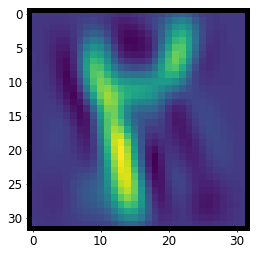

In [89]:
i = 776
plt.imshow(pca_X_pic[i])
predict = model.predict(pca_X[i].reshape(-1,20))
print("the predict value is :{}".format(predict))

**Confusing matrix**


|TP||FP|
|----||----|
|FN ||TN|

In [90]:
from sklearn.metrics import confusion_matrix
Y_predict = model.predict(pca_X_test)
cnfmatrix = confusion_matrix(Y_test,Y_predict)
print(cnfmatrix)


[[2539    0    0    0    0    8    0    0    0    0]
 [   0 2565    0    0    0    0    0    0    0    3]
 [   4   15 2403   48    2    0    2    4    0    0]
 [   6    1  101 2415   51    3    1    2    0    1]
 [   5    1   28  109 2458    2    4    3    0    1]
 [   7    3    0    0    6 2505    3    1   12    0]
 [   1   10    3    0    1    1 2504    2    0   23]
 [   0    3   10    0    1    0    3 2576    0    0]
 [   1    3    0    0    0    0    1    1 2574    3]
 [   4   18    2    0    0    0   21    0    4 2496]]




---



---



---



#Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(pca_X_train,Y_train)
score = model.score(pca_X_test, Y_test) 
print("the score of the linear regression is: {} ".format(score))

the score of the linear regression is: 0.9216038768172581 


**Confusing matrix**


|TP||FP|
|----||----|
|FN ||TN|

In [92]:
from sklearn.metrics import confusion_matrix
Y_predict = model.predict(pca_X_test)
cnfmatrix = confusion_matrix(Y_test,Y_predict)
print(cnfmatrix)


[[2502    1    1    8    9   15    3    3    4    1]
 [   3 2483   29    3   11    3   13    5    4   14]
 [   2   34 2203  106   68    2   34   12    2   15]
 [   9    3  148 2177  202    9   10   14    1    8]
 [   9   12   74  205 2202   37   29   11   16   16]
 [  27    5    7   12   34 2363   10   12   59    8]
 [   1   13   26   10   30   17 2318   43    3   84]
 [   2    4   25   15   12    7   38 2482    1    7]
 [   4    5    1    1    9   35   16    2 2483   27]
 [   2   21   13    5   19    7   69    4   36 2369]]


and now some cool predictions

the predict value is :[3]


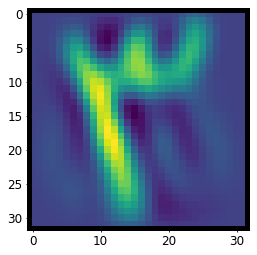

In [93]:
i = 12
plt.imshow(pca_X_pic[i])
predict = model.predict(pca_X[i].reshape(-1,20))
print("the predict value is :{}".format(predict))



---



---



---


#Learning Curve


In [0]:
from sklearn.model_selection import learning_curve, validation_curve

In [0]:
train_sizes = [1, 100, 200, 300, 400, 500, 600]
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(10), X = pca_X_train,
                                                   y = Y_train, train_sizes = train_sizes, cv = 5)

In [0]:
Image size


In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='# Training Samples', ylabel='LOSS')
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')
ax.legend(loc=0)
plt.yscale('log')


#Confusion Matrix


The format of matrix is :

|TP||FP|
|----||----|
|FN ||TN|